# 선물추천

In [223]:
import bs4
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')  

- 인스타그램 접속

In [14]:
driver = webdriver.Chrome('chromedriver.exe')

In [15]:
import time

# 인스타그램 접속하기
driver.get('https://www.instargram.com')

#로딩하는데 시간이 걸릴 수 있으므로 3초간 대기
time.sleep(3)

In [16]:
# 인스타계정으로 로그인
insta_id = '******'   
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]

password = 'PW 입력' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]

input_id.send_keys(insta_id)
input_pw.send_keys(password)

first = driver.find_element_by_css_selector("#loginForm > div.Igw0E.IwRSH.eGOV_._4EzTm.kEKum > div:nth-child(3)")
first.click()

IndexError: list index out of range

In [17]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [18]:
word = '성년의날선물'
url = searching(word)
driver.get(url)

In [19]:
def click_first(driver):
    first = driver.find_element_by_css_selector('#react-root > section > main > article > div:nth-child(3) > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
    first.click()
    time.sleep(3)
click_first(driver)

- 게시글 정보 가져오기

In [20]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['𝘋𝘢𝘷𝘪𝘪__ 세미아치 콤보눈썹⠀⠀⠀⠀고객님 취향 고대로~~ 반영한 맞춤눈썹의 정석! 🧙\u200d♀️우리 예쁜 학생 고객님이신데 !!평소 아주얇고~ 길~게뺀 눈썹을 그리신다고 하셔서최대한 얇은 디자인으로잡아드렸어용 🤏⠀눈썹을 풍성하게만들어주는 결 작업과!꼬리를 확실하게잡을수있는 색채우기작업까지 완벽..🤎⠀⠀⠀⠀⠀반영구 할인 𝐄𝐕𝐄𝐍𝐓 🤍- 수험생, 02년생 반영구시술 𝟓𝟎% 할인- 수험생 + 동반 1인까지 가능- 신분증, 수험표 필수 지참 (기간 1/31일까지)⠀- 그 외 고객님들도 신년 할인 이벤트중이에용❤⠀⠀⠀⠀⌨ 𝐃𝐚𝐯𝐢𝐢 𝐛𝐫𝐨𝐰 예약/상담문의✓ 인스타 상단 오픈카카오톡 클릭(@davii__brow)',
 '2021-01-12',
 '74',
 '부천상동',
 []]

In [21]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [22]:
word = "성년의날선물"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result1 = [ ]


# 여러 게시글 수집하기
target = 500      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result1.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)

In [23]:
# 인스타그램 검색페이지 URL 만들기
word = '성년의날'
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result2 = [ ]


# 여러 게시글 수집하기
target = 500      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result2.append(data)
        next_page(driver)
    except:
        time.sleep(2)
        next_page(driver) 

In [24]:
# 인스타그램 검색페이지 URL 만들기
word = '성년선물'
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result3 = [ ]


# 여러 게시글 수집하기
target = 500      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result3.append(data)
        next_page(driver)
    except:
        time.sleep(2)
        next_page(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow"}
  (Session info: chrome=87.0.4280.141)


In [34]:
df = pd.DataFrame([])
df.append(result1)
df.append(result2)
df=df.append(result3)
df.columns = ['본문','시간','좋아요','위치','해쉬태그']

In [35]:
df.drop_duplicates(subset = ['본문'] , inplace = True)
df=df.reset_index(drop=True)

- 엑셀 파일로 다운로드

In [36]:
# 엑셀 파일 이름을 모아둔다.
os.chdir(r'C:\Users\USER\Downloads')
file_list = os.listdir()
my_excel_files =[]
for x in file_list:
    if x[-3:] == 'xls' and x[:2]=='좋아요':
        my_excel_files += [x]

In [37]:
# 읽어 들여서 하나의 데이터 프레임으로 통합한다.
n_excels = len(my_excel_files)
for i in range(n_excels):  
    a_df = pd.read_excel(my_excel_files[i],header=2, na_values = [' ', '-'])
    if i == 0:
        df = a_df
    else:
        df = pd.concat([df,a_df], axis=0, ignore_index=True)

In [46]:
df

,본문,시간,좋아요,위치,해쉬태그
0,엄마 감사해 사랑해 💖#성년선물,2020-12-31,18,,[#성년선물]
1,Merry Christmas~모두 행복한 성탄절 보내세요~,2020-12-25,79,,[]
2,・・올해 크리스마스케이크는 한정 으로 제작 해 드려요🙆‍♀️연이어 #마카...,2020-12-23,10,,"[#마카롱케이크, #크리스마스케이크🎄, #르브레드..."
3,・・소소하게 전하시는 #감사선물#코로나극보...,2020-12-23,6,,"[#감사선물, #코로나극복👊🏻・・, #르브레드, #..."
4,・・#토끼🐰폼폼#애기꽃다발올해는 사진만 찍고 #...,2020-12-23,5,,"[#토끼🐰폼폼, #애기꽃다발올해는, #종업식을,..."
...,...,...,...,...,...
149,나비인듯 나비아닌 귀걸이카톡아이디 📍qq1644📍 네이버 블로그 검색📌qq쥬얼리📌#...,2017-02-23,4,,"[#탈라토너, #소티스수분앰플, #마리꼬콜라겐, #히스토메르씨, #14k반지, #반..."
150,화이트데이 이벤트 📍쥬얼리(14k)+화장품📍 핫딜 십만원대 구매 가능합니다😊😊많은 ...,2017-02-23,7,,"[#탈라토너, #소티스수분앰플, #마리꼬콜라겐, #히스토메르씨, #14k반지, #반..."
151,카톡아이디 📍qq1644📍 네이버 블로그 검색📌qq쥬얼리📌#탈라토너#소티스수분앰플#...,2017-02-23,3,,"[#탈라토너, #소티스수분앰플, #마리꼬콜라겐, #히스토메르씨, #14k반지, #반..."
152,카톡아이디 📍qq1644📍 네이버 블로그 검색📌qq쥬얼리📌 #탈라토너#소티스수분앰플...,2017-02-23,6,,"[#탈라토너, #소티스수분앰플, #마리꼬콜라겐, #히스토메르씨, #14k반지, #반..."


In [45]:
df.to_excel('adult.xlsx')

In [39]:
# 불필요 컬럼 제거.
df = df.drop(columns = [])

In [40]:
df9 = df.loc[:,['본문']]

In [41]:
df9

,본문
0,엄마 감사해 사랑해 💖#성년선물
1,Merry Christmas~모두 행복한 성탄절 보내세요~
2,・・올해 크리스마스케이크는 한정 으로 제작 해 드려요🙆‍♀️연이어 #마카...
3,・・소소하게 전하시는 #감사선물#코로나극보...
4,・・#토끼🐰폼폼#애기꽃다발올해는 사진만 찍고 #...
...,...
149,나비인듯 나비아닌 귀걸이카톡아이디 📍qq1644📍 네이버 블로그 검색📌qq쥬얼리📌#...
150,화이트데이 이벤트 📍쥬얼리(14k)+화장품📍 핫딜 십만원대 구매 가능합니다😊😊많은 ...
151,카톡아이디 📍qq1644📍 네이버 블로그 검색📌qq쥬얼리📌#탈라토너#소티스수분앰플#...
152,카톡아이디 📍qq1644📍 네이버 블로그 검색📌qq쥬얼리📌 #탈라토너#소티스수분앰플...


In [87]:
import numpy as np
df8 = df9['본문'].to_list()
print(df8)

['엄마 감사해 사랑해 💖#성년선물', 'Merry Christmas~모두 행복한 성탄절 보내세요~', '・・올해 크리스마스케이크는 한정 으로 제작 해 드려요🙆\u200d♀️연이어 #마카롱케이크 예약주셧어요항상 감사드려요🙏🏻・・#크리스마스케이크🎄#르브레드#꽃을만지는시간#꽃시#양평꽃집#양평꽃다발#양평꽃바구니#양평수입꽃#양평플라워케이크#양평생화케이크#양평벌룬플라워#양평풍선꽃#특별한꽃선물#양평레터링풍선#레터링벌룬플라워#신혼선물#성년선물#부모님선물추천#파티케이크#왕관케이크#레터링케이크#양평제작케이크#양평커스텀케이크#양평커스텀풍선#양수리맛집#서종맛집#두물머리#용문산맛집', '・・소소하게 전하시는 #감사선물#코로나극복👊🏻・・#르브레드#꽃을만지는시간#꽃시#양평꽃집#양평꽃다발#양평꽃바구니#양평수입꽃#양평플라워케이크#양평생화케이크#양평벌룬플라워#양평풍선꽃#특별한꽃선물#양평레터링풍선#레터링벌룬플라워#신혼선물#성년선물#부모님선물추천#파티케이크#왕관케이크#레터링케이크#양평제작케이크#양평커스텀케이크#

- 워드 클라우드 생성

In [43]:
#처음엔 설치 필요!
!pip install wordcloud
from wordcloud import WordCloud
import konlpy
import numpy as np
import pandas as pd
import re, os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
%matplotlib inline

In [243]:
no_meaning = "관련|요청|개선|건의|시장|민원|이용"
no_meaning += "|올해|드려요|양평|광고|블로그|카페|네이버|오너먼트|추천|카톡아이디|부탁"
my_text_clean = []
for a_line in df8:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('[a-zA-Z]',' ',a_line)       # 영문 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    a_line = re.sub('^#', ' ', a_line)          # 잉여 스페이즈 줄임.
    my_text_clean += [a_line]

In [244]:
# 몇개만 출력해 본다.
my_text_clean[:10]

['엄마 감사해 사랑해 💖#성년선물',
 ' 모두 행복한 성탄절 보내세요 ',
 '・・ 크리스마스케이크는 한정 으로 제작 해 🙆\u200d♀️연이어 #마카롱케이크 예약주셧어요항상 감사드려요🙏🏻・・#크리스마스케이크🎄#르브레드#꽃을만지는시간#꽃시#양평꽃집#양평꽃다발#양평꽃바구니#양평수입꽃#양평플라워케이크#양평생화케이크#양평벌룬플라워#양평풍선꽃#특별한꽃선물#양평레터링풍선#레터링벌룬플라워#신혼선물#성년선물#부모님선물추천#파티케이크#왕관케이크#레터링케이크#양평제작케이크#양평커스텀케이크#양평커스텀풍선#양수리맛집#서종맛집#두물머리#용문산맛집',
 '・・소소하게 전하시는 #감사선물#코로나극복👊🏻・・#르브레드#꽃을만지는시간#꽃시#양평꽃집#양평꽃다발#양평꽃바구니#양평수입꽃#양평플라워케이크#양평생화케이크#양평벌룬플라워#양평풍선꽃#특별한꽃선물#양평레터링풍선#레터링벌룬플라워#신혼선물#성년선물#부모님선물추천#파티케이크#왕관케이크#레터링케이크#양평제작케이크#양평커스텀케이크#양평커스텀풍ᄉ

In [245]:
# 한글 단어 추출
hannanum = konlpy.tag.Hannanum()

In [246]:
# 명사 추출.
my_words = []
for a_line in my_text_clean:
    my_words += hannanum.nouns(a_line)

In [247]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [248]:
# Series 로 변환.
my_series = pd.Series(my_words_2)

In [249]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:20]

⠀⠀⠀⠀⠀                                                                                38
#성년선물                                                                                36
쥬얼리#                                                                                 30
반지#반지#금반지#                                                                           30
반지#                                                                                  30
검색📌                                                                                  28
#선물                                                                                  25
귀걸이                                                                                  22
관심                                                                                   21
쥬얼리📌많                                                                                19
_____                                                                                17
귀걸이#                            

In [250]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(my_words_2)

In [251]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

{'반지 반지': 1.0,
 '반지 금반지': 1.0,
 '금반지 반지': 1.0,
 '반지 쥬얼리': 1.0,
 '미스반지 레이어드반지': 1.0,
 '레이어드반지 반지성애자': 1.0,
 '레이스반지 우정반지': 1.0,
 '우정반지 나를위한선물': 1.0,
 '나를위한선물 졸업선물': 1.0,
 '졸업선물 입학선물': 1.0,
 '입학선물 성년선물': 1.0,
 '성년선물 팔찌': 1.0,
 '팔찌 목걸이': 1.0,
 '반지성애자 화이트데이': 0.9666666666666667,
 '화이트데이 제품사진': 0.9666666666666667,
 '제품사진 레이스반지': 0.9666666666666667,
 '검색 쥬얼리': 0.9333333333333333,
 '목걸이 귀걸이': 0.9333333333333333,
 '히스토메르씨 반지': 0.8,
 '많 관심': 0.7,
 '탈라토너 소티스수분앰플': 0.7,
 '소티스수분앰플 마리꼬콜라겐': 0.7,
 '마리꼬콜라겐 히스토메르씨': 0.7,
 '쥬얼리 많': 0.6333333333333333,
 '귀걸이 귀걸이': 0.6,
 '토파즈': 0.5333333333333333,
 '_____ _____': 0.5333333333333333,
 '쥬얼리 미스반지': 0.5333333333333333,
 '나뭇잎귀걸이 귀걸이': 0.5333333333333333,
 '쥬얼리 미스링': 0.4666666666666667}

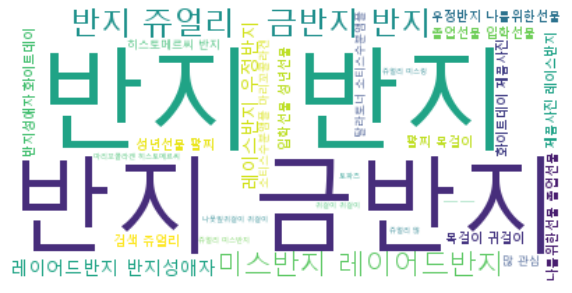

In [252]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

In [253]:
# 백그라운드 마스크
#img = Image.open('background_1.png')                    # 타원형.
#img = Image.open('background_2.png')                   # 말풍선.
img = Image.open('present2.png')                    # 하트.
back_mask = np.array(img)

In [254]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",background_color='white', max_words=30, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence) 

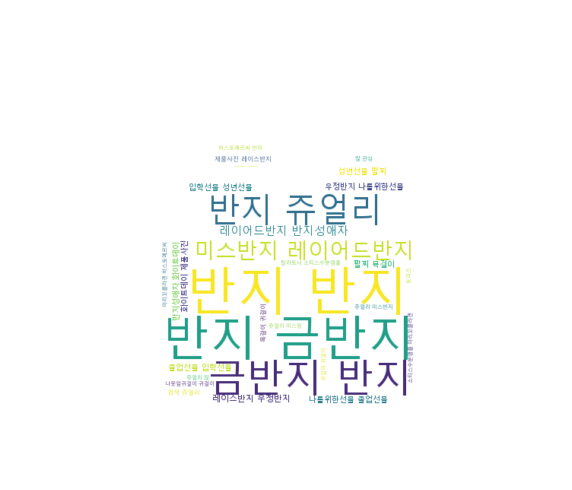

In [255]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

- 시각화

In [256]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
df7 = my_word_counts[:20]

In [257]:
df7

⠀⠀⠀⠀⠀                                                                                38
#성년선물                                                                                36
쥬얼리#                                                                                 30
반지#반지#금반지#                                                                           30
반지#                                                                                  30
검색📌                                                                                  28
#선물                                                                                  25
귀걸이                                                                                  22
관심                                                                                   21
쥬얼리📌많                                                                                19
_____                                                                                17
귀걸이#                            

In [258]:
type(df7)

pandas.core.series.Series

In [270]:
new = df7.to_dict()
new

{'⠀⠀⠀⠀⠀': 38,
 '#성년선물': 36,
 '쥬얼리#': 30,
 '반지#반지#금반지#': 30,
 '반지#': 30,
 '검색📌': 28,
 '#선물': 25,
 '귀걸이': 22,
 '관심': 21,
 '쥬얼리📌많': 19,
 '_____': 17,
 '귀걸이#': 17,
 '#탈라토너#소티스수분앰플#마리꼬콜라겐#히스토메르씨#': 16,
 '#플라워샵': 16,
 '#청주봉명동맛집': 16,
 '토파즈': 15,
 '보석': 15,
 '#송도꽃집': 15,
 '#미스반지#레이어드반지#반지성애자#화이트데이#제품사진#레이스반지#우정반지#나를위한선물#졸업선물#입학선물#성년선물#팔찌#목걸이#귀걸이#나뭇잎귀걸이#': 13,
 '#플라워박스': 13}

In [281]:
df6 = pd.DataFrame(new, index=['빈도수'])

In [282]:
df6

,⠀⠀⠀⠀⠀,#성년선물,쥬얼리#,반지#반지#금반지#,반지#,검색📌,#선물,귀걸이,관심,쥬얼리📌많,_____,귀걸이#,#탈라토너#소티스수분앰플#마리꼬콜라겐#히스토메르씨#,#플라워샵,#청주봉명동맛집,토파즈,보석,#송도꽃집,#미스반지#레이어드반지#반지성애자#화이트데이#제품사진#레이스반지#우정반지#나를위한선물#졸업선물#입학선물#성년선물#팔찌#목걸이#귀걸이#나뭇잎귀걸이#,#플라워박스
빈도수,38,36,30,30,30,28,25,22,21,19,17,17,16,16,16,15,15,15,13,13


In [313]:
df5 = df6.iloc[:, 2:9]
df5

,쥬얼리#,반지#반지#금반지#,반지#,검색📌,#선물,귀걸이,관심
빈도수,30,30,30,28,25,22,21


In [314]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

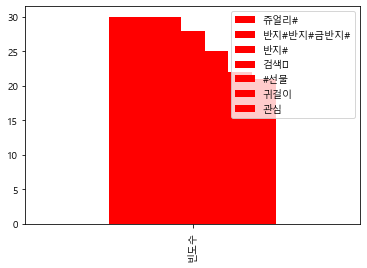

In [315]:
df5.plot.bar(color='red')
plt.show() 